# 1. 데이터 가져오기

In [3]:
import pandas as pd
total_data = pd.read_excel('./scraping.files/tech_scraping.xlsx')
total_data.head(10)

,star grade,review
0,1.5,둘다 *근에 팔았어요.\n\n와치페이스 최악\n문의답변도 성의 없고 너무 오래 걸리...
1,5.0,사용한지 꽤 지나서 평가를 남기게 되었네요~^^;;\n아마 와디즈 첫 펀딩이라 평가...
2,5.0,첫 스마트워치인데 워치페이스 커스텀편집이 안되는것 빼면 만족하고 사용중입니다.
3,2.5,다양한 기능이 있지만 정상적으로 잘동하지 않는경우가 많아요...\n그리고 워치페이스...
4,4.0,기능적으로 만족합니다. 별도로 구입한 메탈스트랩은 아쉽네요.
5,1.0,추가 밴드가 불량입니다. 펀딩 이후 곧바로 시중에서 더 저렴하게 구매가 가능했네요.
6,3.5,화면이 아쉽지만 그냥 쓸만합니다
7,2.0,싸게 잘 산 것 뿐
8,4.0,첫 스마트워치라 그런지 별 불만 없이 잘 사용하고 있어요. 복잡한 기능을 원한 것도...
9,2.5,가성비 좋을 줄 알았는데 그저 그러해서 아쉬웠네요


In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15468 entries, 0 to 15467
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   star grade  15468 non-null  float64
 1   review      15468 non-null  object 
dtypes: float64(1), object(1)
memory usage: 241.8+ KB


In [5]:
len(total_data)  # null 값 없음을 알수있다.

15468

# 2. 데이터 전처리

In [6]:
x_data = total_data['review']
y_data = total_data['star grade']

## y_data 전처리
: rate의 범위를 [1,2,3,4,5]로 만들기 위해 소수점 rate 처리

In [7]:
def make_y_data(val):
    if (1 <= val < 2):
        return 1
    elif (2 <= val < 3):
        return 2
    elif (3 <= val < 4):
        return 3
    elif (4 <= val < 5):
        return 4
    elif (5 <= val < 6):
        return 5
    else:
        return None

In [8]:
y_data = y_data.apply(lambda val:make_y_data(val))

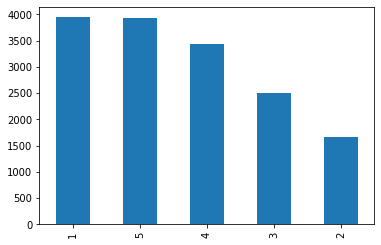

In [9]:
y_data.value_counts().plot(kind='bar')

In [10]:
y_data

0        1
1        5
2        5
3        2
4        4
        ..
15463    5
15464    5
15465    5
15466    5
15467    5
Name: star grade, Length: 15468, dtype: int64

## Split data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((11601,), (11601,), (3867,), (3867,))

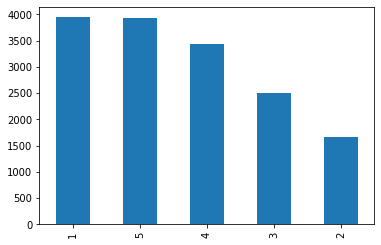

In [13]:
y_data.value_counts().plot(kind='bar')

## NPL (테스트 전처리)

In [14]:
!python -m pip install --upgrade pip

     |████████████████████████████████| 1.6 MB 5.0 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [15]:
!python -m pip install konlpy 

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 86 kB 4.7 MB/s 
     |████████████████████████████████| 448 kB 59.2 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [16]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  18215      0 --:--:-- --:--:-- --:--:-- 18215


In [17]:
!bash ./mecab.sh

Installing automake (A dependency for mecab-ko)
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [543 kB]
Get:12 http://security.ub

In [18]:
x_train.str.replace('[^가-힣ㄱ-ㅎㅠ ]','')

6414     벌레가 아직 많이 있지는 않아서 잘잡는지는 모르겠지만 확실히 잘죽입니다자외선이라 그...
5252         알림을 최우선으로 기대하였는데 진동이 약하여 움직이는 경우 못 느낄 때가 많습니다
15017    제품자체는 나쁘지 않은데 몇몇가지 문제로 너무 혹평가득한 듯하여 안타깝네요 저는 만...
11902                               가격대비 나름 만족합니다낚시할때 좋겠네요
10332    배송 받았는데 이건 아니다 싶네요제가 지금까지 여러개의 손풍기를 사용해봤는데이것만큼...
                               ...                        
11889                       생각만큼 바람이 세지 않음 옷속에 넣는게 큰장점이였는데
3445                                    위험해서 못쓰겠네요 환불 바랍니다
7161                                          잘쓰겠습니다 감사합니다
365      제품이 생각보다 더 별로네요일단 한글화도 완벽하진 않네요 타이머 쓰는데 시간조과 로...
7817     소음등 몇가지 작은 문제는 있지만 전반적으로 만족합니다 이 가격에 발뮤다의 퀄리티를...
Name: review, Length: 11601, dtype: object

In [19]:
from konlpy.tag import Mecab

In [20]:
mecab = Mecab()

In [21]:
stopwords = ['의', '은', '는', '이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리'
, '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하', '때문', '그것', '두', '말하', '알', '그러나'
, '받', '못하', '일', '그런', '또', '문제', '더', '사회', '많', '그리고', '좋', '크', '따르', '중', '나오', '가지', '씨'
, '시키', '만들', '지금', '생각하', '그러', '속', '하나', '집', '살', '모르', '적', '월', '데', '자신', '안', '어떤', '내'
, '경우', '명', '생각', '시간', '그녀', '다시', '이런', '앞', '보이', '번', '나', '다른', '어떻', '여자', '개', '전', '들'
, '사실', '이렇', '점', '싶', '말', '정도', '좀', '원', '잘', '통하', '소리', '놓', '걍', '과', '를', '으로', '자', '에', '와', '한', '하다']

In [22]:
import pickle

In [23]:
pickle.dump(stopwords, open('./stopwords.pkl','wb'))

In [24]:
sentence = list()

for tok in x_train:
  encoded = mecab.morphs(tok)
  sentence.append([item for item in encoded if item not in stopwords])

sentence

[['벌레',
  '아직',
  '많이',
  '아서',
  '잡',
  '는지',
  '겠',
  '지만',
  '확실히',
  '죽',
  '입니다',
  '.',
  '자외선',
  '라',
  '그런지',
  '일반',
  '무드',
  '이랑',
  '다르',
  '게',
  '몇몇',
  '물건',
  '반사',
  '면',
  '야광',
  '인',
  '거',
  '처럼',
  '빛',
  '납니다',
  '.',
  '모터',
  '조금',
  '큰',
  '거',
  '제외',
  '면',
  '만족',
  '합니다',
  '.'],
 ['알림',
  '을',
  '최우선',
  '기대',
  '였',
  '는데',
  '진동',
  '약하',
  '여',
  '움직이',
  '못',
  '느낄',
  '습니다',
  '.'],
 ['제품',
  '자체',
  '나쁘',
  '은데',
  '몇몇',
  '로',
  '너무',
  '혹평',
  '가득',
  '듯',
  '여',
  '안타깝',
  '네요',
  '.',
  '저',
  '만족',
  '며',
  '사용',
  '입니다',
  '.',
  '아이디',
  '로',
  '베이직',
  '3',
  'pd',
  '2',
  '총',
  '다섯',
  '구매',
  '했',
  '습니다',
  '.',
  '배송',
  '메이커',
  '쪽',
  '해명',
  '맞',
  '다고',
  '게',
  '베이직',
  '송장',
  '뜨',
  '자마자',
  '(',
  '5',
  '/',
  '3',
  ')',
  '바로',
  '왔',
  '습니다',
  '.',
  'pd',
  '이틀',
  '았',
  '네요',
  '.',
  '자세',
  '건',
  '겠',
  '지만',
  '.',
  '일부러',
  '송장',
  '번호',
  '부터',
  '뽑',
  '고',
  '건',
  '아닌',
  '습니다',
  '.',
  '계속',
  '얘기',
  '삼성',

## Tokenizer

In [25]:
import tensorflow as tf

In [26]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [27]:
tokenizer.fit_on_texts(sentence)

In [28]:
tokenizer.word_index

{'.': 1,
 '고': 2,
 '도': 3,
 '을': 4,
 '습니다': 5,
 '네요': 6,
 '게': 7,
 ',': 8,
 '는데': 9,
 '제품': 10,
 '사용': 11,
 '했': 12,
 '면': 13,
 '해': 14,
 '로': 15,
 '합니다': 16,
 '다': 17,
 '어': 18,
 '만': 19,
 '에서': 20,
 '기': 21,
 '지만': 22,
 '겠': 23,
 '거': 24,
 '었': 25,
 '..': 26,
 '할': 27,
 '았': 28,
 '!': 29,
 '쓰': 30,
 '너무': 31,
 '만족': 32,
 '어요': 33,
 '펀딩': 34,
 '?': 35,
 '입니다': 36,
 '시': 37,
 '니': 38,
 '해서': 39,
 '아': 40,
 '부분': 41,
 '아요': 42,
 '보다': 43,
 '충전': 44,
 '1': 45,
 '2': 46,
 '저': 47,
 '분': 48,
 '라': 49,
 '어서': 50,
 ')': 51,
 '소음': 52,
 '3': 53,
 '(': 54,
 '던': 55,
 '음': 56,
 '인': 57,
 '서': 58,
 '제': 59,
 '-': 60,
 '으면': 61,
 '아서': 62,
 '~': 63,
 '연결': 64,
 '정말': 65,
 '까지': 66,
 '건': 67,
 '많이': 68,
 '환불': 69,
 '그냥': 70,
 '조금': 71,
 '가격': 72,
 '듯': 73,
 '다고': 74,
 '배송': 75,
 '못': 76,
 '긴': 77,
 '구매': 78,
 '기대': 79,
 '처음': 80,
 '요': 81,
 '디자인': 82,
 '바람': 83,
 '괜찮': 84,
 '면서': 85,
 '라고': 86,
 '다는': 87,
 '디즈': 88,
 '불편': 89,
 '봤': 90,
 '된': 91,
 '다가': 92,
 '기능': 93,
 '함': 94,
 '느낌': 95,
 '인데': 9

In [29]:
tokenizer.word_counts

OrderedDict([('벌레', 69),
             ('아직', 807),
             ('많이', 1303),
             ('아서', 1468),
             ('잡', 461),
             ('는지', 701),
             ('겠', 3654),
             ('지만', 3728),
             ('확실히', 330),
             ('죽', 53),
             ('입니다', 2713),
             ('.', 44285),
             ('자외선', 2),
             ('라', 1888),
             ('그런지', 218),
             ('일반', 280),
             ('무드', 52),
             ('이랑', 286),
             ('다르', 184),
             ('게', 7065),
             ('몇몇', 34),
             ('물건', 552),
             ('반사', 7),
             ('면', 4809),
             ('야광', 1),
             ('인', 1583),
             ('거', 3618),
             ('처럼', 603),
             ('빛', 155),
             ('납니다', 112),
             ('모터', 122),
             ('조금', 1273),
             ('큰', 813),
             ('제외', 89),
             ('만족', 2825),
             ('합니다', 4117),
             ('알림', 149),
             ('을', 12351),
            

In [30]:
total_cnt = len(tokenizer.word_index)

rare_cnt = 0
total_freq, rare_freq = 0, 0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value  # 전체 단어 수
  if (value <= 2):
    rare_cnt = rare_cnt + 1
    rare_freq = rare_freq + value  # 2 미만의 수

In [31]:
total_cnt, rare_cnt, rare_cnt/total_cnt, rare_freq/total_freq

(19918, 10737, 0.5390601466010644, 0.019455309454205195)

In [32]:
vocab_size = total_cnt - rare_cnt

In [33]:
vocab_size

9181

In [34]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')

In [1]:
tokenizer.fit_on_texts(sentence)

NameError: name 'tokenizer' is not defined

In [36]:
tokenizer.index_word

{1: 'OOV',
 2: '.',
 3: '고',
 4: '도',
 5: '을',
 6: '습니다',
 7: '네요',
 8: '게',
 9: ',',
 10: '는데',
 11: '제품',
 12: '사용',
 13: '했',
 14: '면',
 15: '해',
 16: '로',
 17: '합니다',
 18: '다',
 19: '어',
 20: '만',
 21: '에서',
 22: '기',
 23: '지만',
 24: '겠',
 25: '거',
 26: '었',
 27: '..',
 28: '할',
 29: '았',
 30: '!',
 31: '쓰',
 32: '너무',
 33: '만족',
 34: '어요',
 35: '펀딩',
 36: '?',
 37: '입니다',
 38: '시',
 39: '니',
 40: '해서',
 41: '아',
 42: '부분',
 43: '아요',
 44: '보다',
 45: '충전',
 46: '1',
 47: '2',
 48: '저',
 49: '분',
 50: '라',
 51: '어서',
 52: ')',
 53: '소음',
 54: '3',
 55: '(',
 56: '던',
 57: '음',
 58: '인',
 59: '서',
 60: '제',
 61: '-',
 62: '으면',
 63: '아서',
 64: '~',
 65: '연결',
 66: '정말',
 67: '까지',
 68: '건',
 69: '많이',
 70: '환불',
 71: '그냥',
 72: '조금',
 73: '가격',
 74: '듯',
 75: '다고',
 76: '배송',
 77: '못',
 78: '긴',
 79: '구매',
 80: '기대',
 81: '처음',
 82: '요',
 83: '디자인',
 84: '바람',
 85: '괜찮',
 86: '면서',
 87: '라고',
 88: '다는',
 89: '디즈',
 90: '불편',
 91: '봤',
 92: '된',
 93: '다가',
 94: '기능',
 95: '함',
 96: '느

In [37]:
pickle.dump(tokenizer, open('./tokenizer.pkl','wb'))

## x_train 숫자화

In [38]:
x_train = tokenizer.texts_to_sequences(sentence)

In [39]:
print(x_train[0:3])

[[1278, 108, 69, 63, 204, 128, 24, 23, 313, 1539, 37, 2, 1, 50, 488, 371, 1567, 367, 575, 8, 2030, 176, 5086, 14, 1, 58, 25, 156, 657, 866, 2, 807, 72, 106, 25, 1064, 14, 33, 17, 2], [680, 5, 1, 80, 118, 10, 651, 611, 160, 870, 77, 1366, 6, 2], [11, 184, 484, 122, 2030, 16, 32, 3995, 2156, 74, 160, 1428, 7, 2, 48, 33, 144, 12, 37, 2, 3799, 16, 1040, 54, 1568, 47, 1738, 3248, 79, 13, 6, 2, 76, 123, 223, 2868, 145, 75, 8, 1040, 1794, 867, 354, 55, 100, 119, 54, 52, 147, 314, 6, 2, 1568, 985, 29, 7, 2, 1333, 68, 24, 23, 2, 2425, 1794, 676, 175, 391, 3, 68, 216, 6, 2, 134, 880, 1158, 375, 1568, 45, 5, 123, 364, 13, 5, 725, 6016, 3800, 2778, 5488, 45, 1540, 262, 1568, 45, 641, 2778, 1540, 20, 1, 543, 45, 497, 896, 212, 466, 18, 118, 6, 2, 550, 986, 15, 198, 29, 23, 1237, 1767, 239, 16, 65, 13, 5, 1568, 510, 65, 13, 5, 45, 787, 896, 118, 6, 2, 48, 481, 5, 1367, 5, 11, 2955, 58, 2156, 13, 10, 781, 387, 315, 5, 339, 3, 12, 15, 39, 33, 109, 6, 2, 328, 510, 302, 65, 183, 375, 624, 45, 104, 17, 2

In [40]:
hist_len = [len(words) for words in x_train]

(array([4.847e+03, 2.849e+03, 1.490e+03, 8.220e+02, 4.840e+02, 2.830e+02,
        2.080e+02, 1.380e+02, 1.070e+02, 7.200e+01, 5.600e+01, 4.600e+01,
        4.100e+01, 2.800e+01, 2.600e+01, 2.100e+01, 5.000e+00, 4.000e+00,
        8.000e+00, 1.300e+01, 2.000e+00, 8.000e+00, 6.000e+00, 6.000e+00,
        6.000e+00, 5.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 5.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([1.00000e+00, 2.77800e+01, 5.45600e+01, 8.13400e+01, 1.08120e+02,
        1.34900e+02, 1.61680e+02, 1.88460e+02, 2.15240e+02, 2.42020e+02,
        2.68800e+02, 2.95580e+02, 3.22360e+02, 3.49140e+02, 3.75920e+02,
        4.02700e+02, 4.29480e+02, 4.56260e+02, 4.83040e+02, 5.09820e+02,
        5.36600e+02, 5.63380e+02, 5.90160e+02, 6.16940e+02, 6.43720e+02,
        6.7

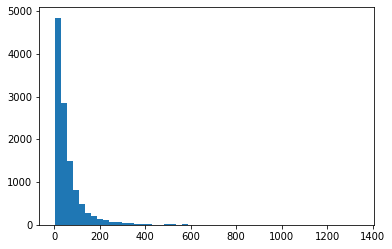

In [41]:
import matplotlib.pyplot as plt
plt.hist(hist_len, bins=50)

### padding

In [42]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=200)

In [43]:
x_train

array([[   0,    0,    0, ...,   33,   17,    2],
       [   0,    0,    0, ..., 1366,    6,    2],
       [   5,    4,   42, ...,   24,    7,    2],
       ...,
       [   0,    0,    0, ...,    2,  174,   17],
       [   0,    0,    0, ...,  101,    2,    2],
       [   0,    0,    0, ...,   29,    6,    2]], dtype=int32)

In [44]:
import numpy as np
y_train = np.array(y_train)-1
np.unique(y_train)

array([0, 1, 2, 3, 4])

In [45]:
len(x_train),len(y_train)

(11601, 11601)

# 3. Make model

In [46]:
model = tf.keras.models.Sequential()

In [47]:
model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=30, input_length=200))  # input layer

# model.add(tf.keras.layers.LSTM(128))  # hidden layer
# model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))  # hidden layer
# model.add(tf.keras.layers.GRU(32, return_sequences=True))  # hidden layer
model.add(tf.keras.layers.GRU(128, return_sequences=True))  # hidden layer
model.add(tf.keras.layers.GRU(64))  # hidden layer

model.add(tf.keras.layers.Dense(5, activation='softmax'))  # output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])  # gadget

In [48]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 30)           275430    
_________________________________________________________________
gru (GRU)                    (None, 200, 32)           6144      
_________________________________________________________________
gru_1 (GRU)                  (None, 200, 128)          62208     
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dense (Dense)                (None, 5)                 325       
Total params: 381,355
Trainable params: 381,355
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(x_train, y_train, epochs=500, batch_size=256, validation_split=0.3, shuffle=True)

Epoch 1/500
32/32 [==============================] - 68s 2s/step - loss: 1.5487 - acc: 0.2924 - val_loss: 1.4200 - val_acc: 0.4039
Epoch 2/500
32/32 [==============================] - 60s 2s/step - loss: 1.2593 - acc: 0.4654 - val_loss: 1.2133 - val_acc: 0.4826
Epoch 3/500
32/32 [==============================] - 60s 2s/step - loss: 1.0440 - acc: 0.5663 - val_loss: 1.1942 - val_acc: 0.4976
Epoch 4/500
32/32 [==============================] - 60s 2s/step - loss: 0.8934 - acc: 0.6264 - val_loss: 1.2382 - val_acc: 0.5093
Epoch 5/500
32/32 [==============================] - 60s 2s/step - loss: 0.7844 - acc: 0.6894 - val_loss: 1.3358 - val_acc: 0.4967
Epoch 6/500
32/32 [==============================] - 60s 2s/step - loss: 0.6692 - acc: 0.7400 - val_loss: 1.5467 - val_acc: 0.4835
Epoch 7/500
32/32 [==============================] - 61s 2s/step - loss: 0.5673 - acc: 0.7904 - val_loss: 1.7673 - val_acc: 0.4591
Epoch 8/500
32/32 [==============================] - 60s 2s/step - loss: 0.4968 - a

# 4. Evaluation

In [ ]:
# model.evaluate(x_train, y_train)  # Bidirection epochs 100 : - loss: 1.3254 - acc: 0.8286 -> (60s)

In [ ]:
# model.evaluate(x_train, y_train)  # GRU(128) epochs 100 : - loss: 1.6015 - acc: 0.8201 -> 대신 훨씬 빠름 (32s)

In [ ]:
# model.evaluate(x_train, y_train)  # GRU(128) epochs 500 : - loss: 1.9807 - acc: 0.8355 -> (18s)

In [ ]:
# model.evaluate(x_train, y_train)  # GRU(128,64) epochs 500 : - loss: 1.7509 - acc: 0.8343 -> (46s)

In [ ]:
model.evaluate(x_train, y_train)

# 5. Service

In [ ]:
model.save('./DL_tech.h5')

# 그래프로 값 비교

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'-r')
plt.show()

In [ ]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'-r')
plt.show()